In [9]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 
import seaborn as sns

%matplotlib inline 
matplotlib.rcParams['figure.figsize']= (12,8)


In [10]:
df = pd.read_csv(r'C:\Users\PCD\Downloads\Graduate.csv')

In [11]:
# take a look at the first 5 rows from the data 
df.head()

,year,college,major,degree,gender,count
0,1435-1436,أصول الدين,السنة وعلومها,الدكتوراه,أنثى,2
1,1435-1436,أصول الدين,السنة وعلومها,الدكتوراه,ذكر,5
2,1435-1436,أصول الدين,السنة وعلومها,الماجستير,أنثى,6
3,1435-1436,أصول الدين,العقيدة والمذاهب المعاصرة,الدكتوراه,أنثى,6
4,1435-1436,أصول الدين,العقيدة والمذاهب المعاصرة,الدكتوراه,ذكر,7


In [12]:
# see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

year - 0.0%
college - 0.0%
major - 0.0%
degree - 0.0%
gender - 0.0%
count - 0.0%


In [13]:
#checking the type 
df.dtypes

year       object
college    object
major      object
degree     object
gender     object
count       int64
dtype: object

In [14]:
# Changing the Years into integer 
df['year'] = df['year'].astype(str).str[:4]

In [15]:
df['year']= df['year'].astype('int64')

In [16]:
df.sort_values(by=['degree','year'],inplace=False,ascending=True).head()

,year,college,major,degree,gender,count
279,1438,العلوم الاجتماعية,التربية,الدبلوم العالي,أنثى,517
280,1438,العلوم الاجتماعية,التربية,الدبلوم العالي,ذكر,189
357,1441,الإعلام والاتصال,الإعلام المتخصص,الدبلوم العالي,ذكر,63
0,1435,أصول الدين,السنة وعلومها,الدكتوراه,أنثى,2
1,1435,أصول الدين,السنة وعلومها,الدكتوراه,ذكر,5


In [17]:
pd.set_option('display.max_rows',None)

In [18]:
df.head()

,year,college,major,degree,gender,count
0,1435,أصول الدين,السنة وعلومها,الدكتوراه,أنثى,2
1,1435,أصول الدين,السنة وعلومها,الدكتوراه,ذكر,5
2,1435,أصول الدين,السنة وعلومها,الماجستير,أنثى,6
3,1435,أصول الدين,العقيدة والمذاهب المعاصرة,الدكتوراه,أنثى,6
4,1435,أصول الدين,العقيدة والمذاهب المعاصرة,الدكتوراه,ذكر,7


<function matplotlib.pyplot.show(close=None, block=None)>

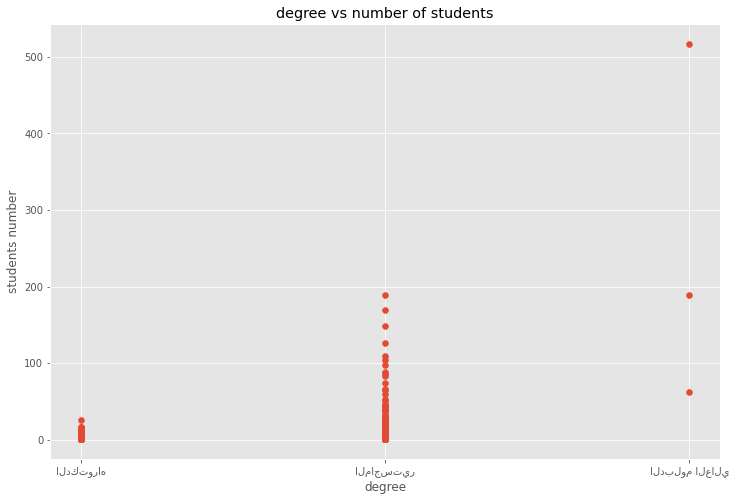

In [19]:
# Graph
plt.scatter(x=df['degree'],y=df['count'])
plt.title('degree vs number of students')
plt.xlabel('degree')
plt.ylabel('students number')
plt.show

In [20]:
    #checking how many years are in the data
    pd.unique(df['year'])

array([1435, 1436, 1437, 1438, 1439, 1441, 1442], dtype=int64)

In [21]:
degree_grp = df.groupby(['degree'])

In [23]:
# Filtering 
degree_grp.get_group('الماجستير').head()

,year,college,major,degree,gender,count
2,1435,أصول الدين,السنة وعلومها,الماجستير,أنثى,6
5,1435,أصول الدين,العقيدة والمذاهب المعاصرة,الماجستير,أنثى,10
6,1435,أصول الدين,العقيدة والمذاهب المعاصرة,الماجستير,ذكر,3
9,1435,أصول الدين,القرآن وعلومه,الماجستير,أنثى,9
10,1435,أصول الدين,القرآن وعلومه,الماجستير,ذكر,5


In [24]:
degree_grp['college'].unique()

degree
الدبلوم العالي                [العلوم الاجتماعية, الإعلام والاتصال]
الدكتوراه         [أصول الدين, التربية, الشريعة, العلوم الاجتماع...
الماجستير         [أصول الدين, الاقتصاد والعلوم الإدارية, التربي...
Name: college, dtype: object

In [25]:
np.size(df['major'].unique())

49

In [26]:
Male = df[(df['degree'] == "الماجستير") & (df['gender'] == 'ذكر')]
Female = df[(df['degree'] == "الماجستير") & (df['gender'] == 'أنثى')]

Female.head()



,year,college,major,degree,gender,count
2,1435,أصول الدين,السنة وعلومها,الماجستير,أنثى,6
5,1435,أصول الدين,العقيدة والمذاهب المعاصرة,الماجستير,أنثى,10
9,1435,أصول الدين,القرآن وعلومه,الماجستير,أنثى,9
11,1435,الاقتصاد والعلوم الإدارية,الاقتصاد,الماجستير,أنثى,15
15,1435,التربية,أصول التربية,الماجستير,أنثى,7


Text(0.5, 1.0, 'Number of Master Student each Year')

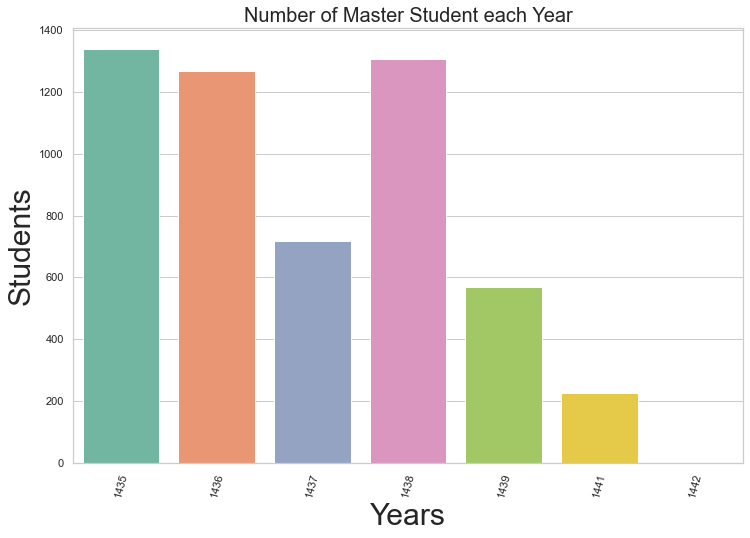

In [27]:
#Making Graphs
Student_by_year = pd.DataFrame(df.groupby('year',as_index=False)['count'].sum())
sns.set_theme(style='whitegrid',color_codes=True)
ax=sns.barplot(x='year',y='count',data=Student_by_year.sort_values(by='year'),palette='Set2')
ax.set_xlabel('Years',fontsize=30)
ax.set_ylabel('Students',fontsize=30)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20,8)
plt.title('Number of Master Student each Year',fontsize = 20)

Text(0.5, 1.0, 'Number of Master Student each College')

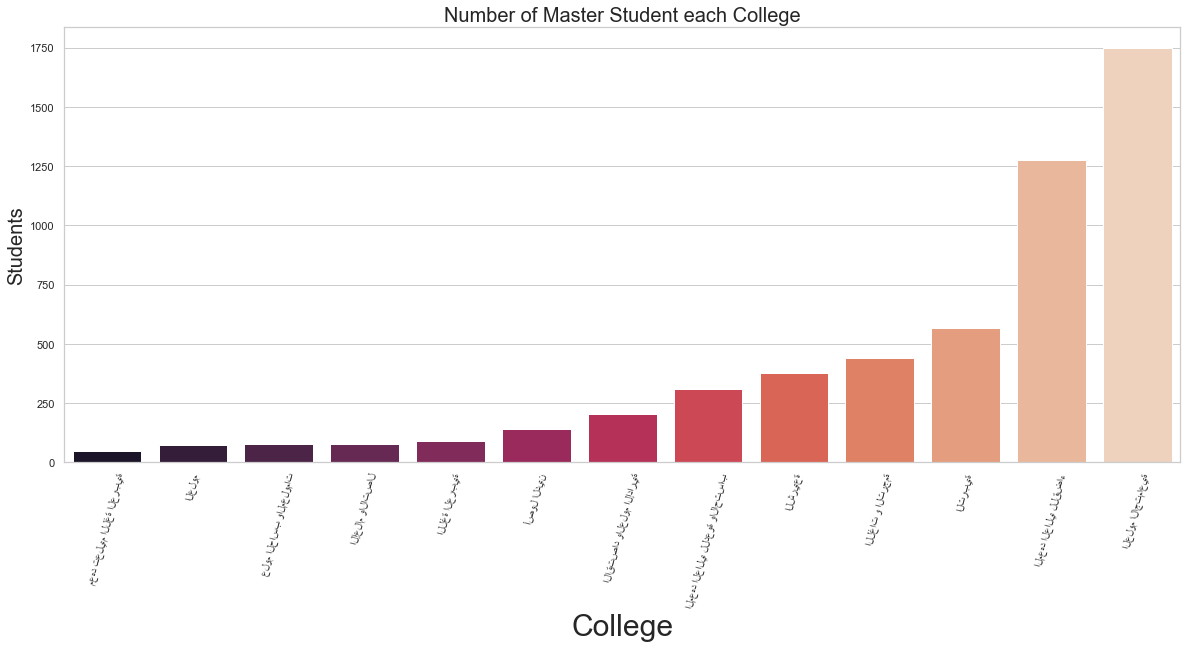

In [28]:
Student_by_college = pd.DataFrame(df.groupby('college',as_index=False)['count'].sum())
sns.set_theme(style='whitegrid',color_codes=True)
ax=sns.barplot(x='college',y='count',data=Student_by_college.sort_values(by='count'),palette='rocket')
ax.set_xlabel('College',fontsize=30)
ax.set_ylabel('Students',fontsize=20)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize'] = (20,8)
plt.title('Number of Master Student each College',fontsize = 20)

In [31]:
Male_count = Male['count'].sum()
Female_count = Female['count'].sum()
y = np.array([Male_count,Female_count])

<function matplotlib.pyplot.show(close=None, block=None)>

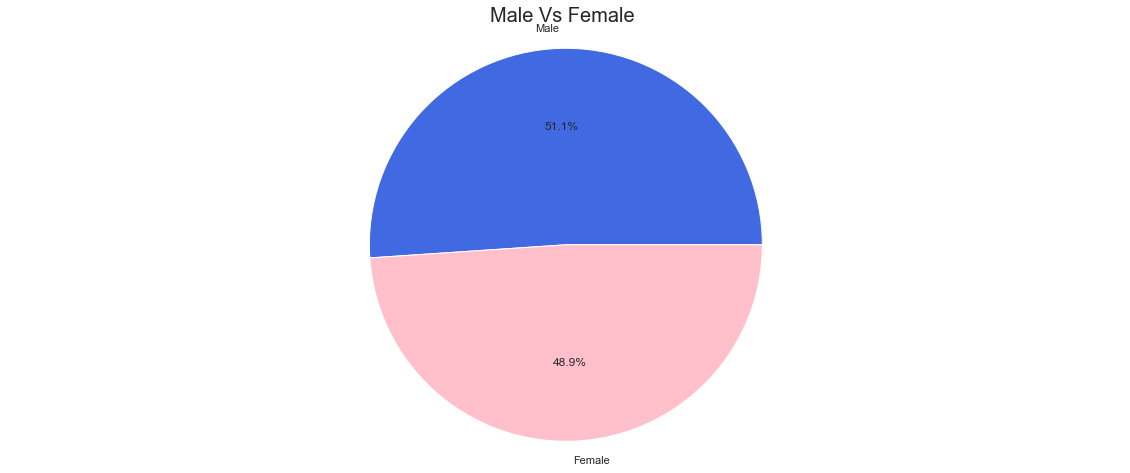

In [30]:

Labels = ['Male','Female']
the_colors = ['royalblue','pink']
plt.pie(y,labels = Labels,autopct='%1.1f%%',colors=the_colors)
plt.title('Male Vs Female ',fontsize=20)
plt.axis('equal')
plt.show